<a href="https://colab.research.google.com/github/ksknysn/Coursera/blob/main/TensorFlowDeveloper/C3_W3_Lab_1_single_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C3/W3/ungraded_labs/C3_W3_Lab_1_single_layer_LSTM.ipynb

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf

In [6]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU7W1HG/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU7W1HG/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteU7W1HG/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [7]:
tokenizer = info.features['text'].encoder

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 172s 416ms/step - loss: 0.5065 - accuracy: 0.7476 - val_loss: 0.3923 - val_accuracy: 0.8401
Epoch 2/10
391/391 [==============================] - 162s 412ms/step - loss: 0.3210 - accuracy: 0.8738 - val_loss: 0.3966 - val_accuracy: 0.8562
Epoch 3/10
391/391 [==============================] - 163s 414ms/step - loss: 0.2707 - accuracy: 0.8968 - val_loss: 0.3880 - val_accuracy: 0.8330
Epoch 4/10
391/391 [==============================] - 162s 413ms/step - loss: 0.2833 - accuracy: 0.8856 - val_loss: 0.4474 - val_accuracy: 0.8431


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fa2020dd5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 5/10
391/391 [==============================] - 164s 417ms/step - loss: 0.2009 - accuracy: 0.9261 - val_loss: 0.4674 - val_accuracy: 0.8333
Epoch 6/10
391/391 [==============================] - 165s 419ms/step - loss: 0.1483 - accuracy: 0.9488 - val_loss: 0.4679 - val_accuracy: 0.8214
Epoch 7/10
391/391 [==============================] - 164s 417ms/step - loss: 0.1518 - accuracy: 0.9449 - val_loss: 0.5442 - val_accuracy: 0.8146
Epoch 8/10
391/391 [==============================] - 163s 415ms/step - loss: 0.1185 - accuracy: 0.9601 - val_loss: 0.5906 - val_accuracy: 0.8317
Epoch 9/10
391/391 [==============================] - 164s 417ms/step - loss: 0.1055 - accuracy: 0.9650 - val_loss: 0.5859 - val_accuracy: 0.8108
Epoch 10/10
391/391 [==============================] - 163s 414ms/step - loss: 0.0977 - accuracy: 0.9732 - val_loss: 1.0631 - val_accuracy: 0.6821


In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

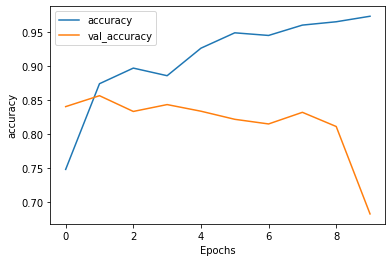

In [14]:
plot_graphs(history, 'accuracy')

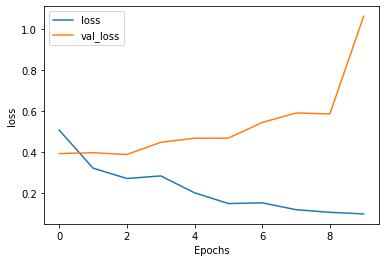

In [15]:
plot_graphs(history, 'loss')